In [1]:
pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/03/12/45a714482b9aa23cf708c5d07810d8133c4277b9d28db55e51352a0cb2da/folium-0.18.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/fc/be/720f85abacd654ec86f1431bc7c004eae74417bd9d0e7a2bc43601062627/branca-0.8.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/108.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.9 kB ? eta -:--:--
   -------------- ------------------------ 41.0/108.9 kB 245.8 kB/s eta 0:00:01
   ----------------------------- --------- 81.9/108.9 kB 416.7 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/108.9 kB 454.0 kB/s eta 0:00:01
   -------------------------------------- 108.9/108.9 kB 450.5 kB/s

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [3]:
api_key = "fb365aa6104829b44455572365ff3b4e"

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/forecast"
city_name = "New York"
params = {
"q": city_name,
"appid": api_key,
"units": "metric"
}
response = requests.get(base_url, params=params)
data = response.json()

In [5]:
response 

<Response [200]>

In [6]:
data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1730862000,
   'main': {'temp': 18.52,
    'feels_like': 18.49,
    'temp_min': 18.22,
    'temp_max': 18.52,
    'pressure': 1020,
    'sea_level': 1020,
    'grnd_level': 1019,
    'humidity': 79,
    'temp_kf': 0.3},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 0},
   'wind': {'speed': 5.5, 'deg': 215, 'gust': 14.08},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'n'},
   'dt_txt': '2024-11-06 03:00:00'},
  {'dt': 1730872800,
   'main': {'temp': 18.09,
    'feels_like': 18.02,
    'temp_min': 17.8,
    'temp_max': 18.09,
    'pressure': 1019,
    'sea_level': 1019,
    'grnd_level': 1018,
    'humidity': 79,
    'temp_kf': 0.29},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 0},
   'wind': {'speed': 6.04, 'deg': 218, 'gust': 15.2},
   'visibility': 10000,
   '

In [10]:
timestamps = [entry["dt"] for entry in weather_data]
temperatures = [entry["main"]["temp"] for entry in weather_data]
humidity = [entry["main"]["humidity"] for entry in weather_data]
wind_speed = [entry["wind"]["speed"] for entry in weather_data]
weather_description = [item['weather'][0]['description'] for item in weather_data]
weather_data

[{'dt': 1730862000,
  'main': {'temp': 18.52,
   'feels_like': 18.49,
   'temp_min': 18.22,
   'temp_max': 18.52,
   'pressure': 1020,
   'sea_level': 1020,
   'grnd_level': 1019,
   'humidity': 79,
   'temp_kf': 0.3},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'clouds': {'all': 0},
  'wind': {'speed': 5.5, 'deg': 215, 'gust': 14.08},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'n'},
  'dt_txt': '2024-11-06 03:00:00'},
 {'dt': 1730872800,
  'main': {'temp': 18.09,
   'feels_like': 18.02,
   'temp_min': 17.8,
   'temp_max': 18.09,
   'pressure': 1019,
   'sea_level': 1019,
   'grnd_level': 1018,
   'humidity': 79,
   'temp_kf': 0.29},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'clouds': {'all': 0},
  'wind': {'speed': 6.04, 'deg': 218, 'gust': 15.2},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'n'},
  'dt_txt': '2024-11-06 06:00:00'},
 {'dt': 1730883600,


In [11]:
datetime_objects = [pd.to_datetime(timestamp, unit="s") for timestamp in timestamps]

In [13]:
weather_df = pd.DataFrame({
'Timestamp': timestamps,
"Datetime": datetime_objects,
'Temperature': temperatures,
'humidity': humidity,
'wind_speed': wind_speed,
'weather_description': weather_description,
})

In [14]:
weather_df.set_index("Datetime", inplace=True)

In [15]:
weather_df

,Timestamp,Temperature,humidity,wind_speed,weather_description
Datetime,,,,,
2024-11-06 03:00:00,1730862000,18.52,79,5.50,clear sky
2024-11-06 06:00:00,1730872800,18.09,79,6.04,clear sky
2024-11-06 09:00:00,1730883600,17.31,77,5.01,clear sky
2024-11-06 12:00:00,1730894400,16.76,81,4.54,clear sky
2024-11-06 15:00:00,1730905200,19.75,69,5.75,clear sky
2024-11-06 18:00:00,1730916000,24.01,53,6.39,clear sky
2024-11-06 21:00:00,1730926800,22.58,58,5.04,overcast clouds
2024-11-07 00:00:00,1730937600,20.42,68,3.77,broken clouds
2024-11-07 03:00:00,1730948400,19.01,77,2.99,scattered clouds


In [17]:
# Calculate total precipitation (rain + snow) for each entry
precipitation = []
for entry in weather_data:
    rain = entry.get("rain", {}).get("3h", 0)
    snow = entry.get("snow", {}).get("3h", 0)
    total_precipitation = rain + snow
    precipitation.append(total_precipitation)

In [18]:
precipitation

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.66,
 1.91]

In [19]:
avg_temp = sum(temperatures) / len(temperatures)
avg_temp

15.737499999999997

In [20]:
max_temp = max(temperatures)
max_temp

24.01

In [21]:
min_temp = min(temperatures)
min_temp

10.59

In [23]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

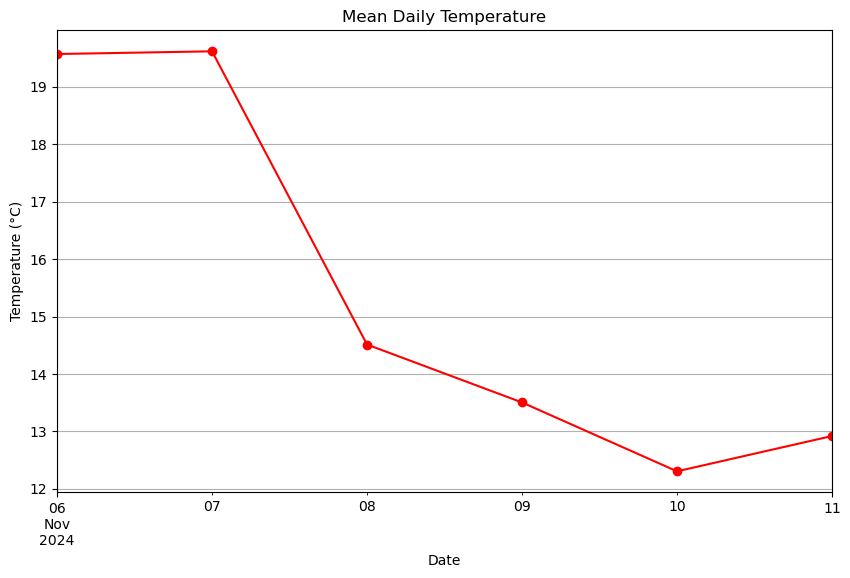

In [24]:
# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

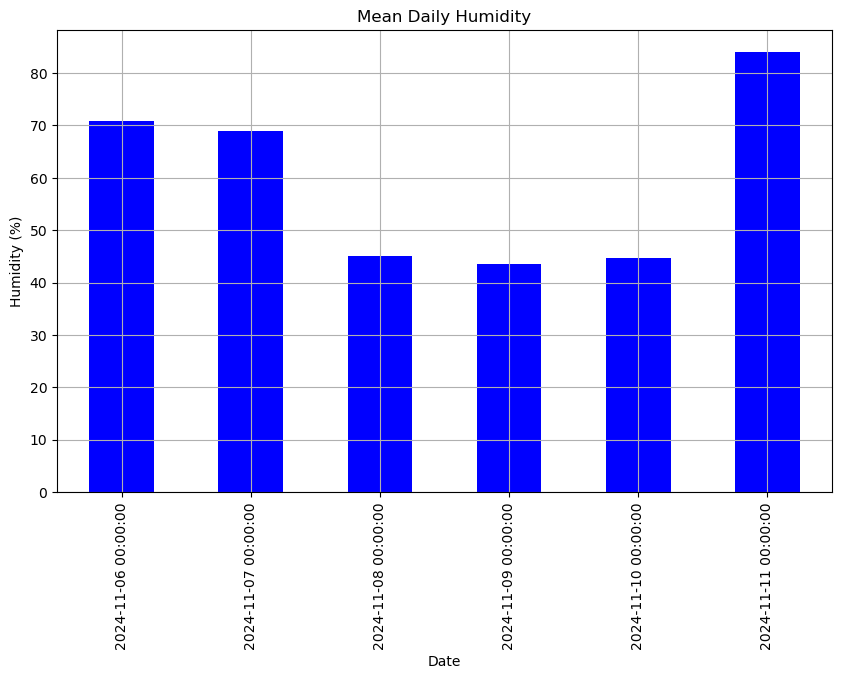

In [25]:
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')

plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

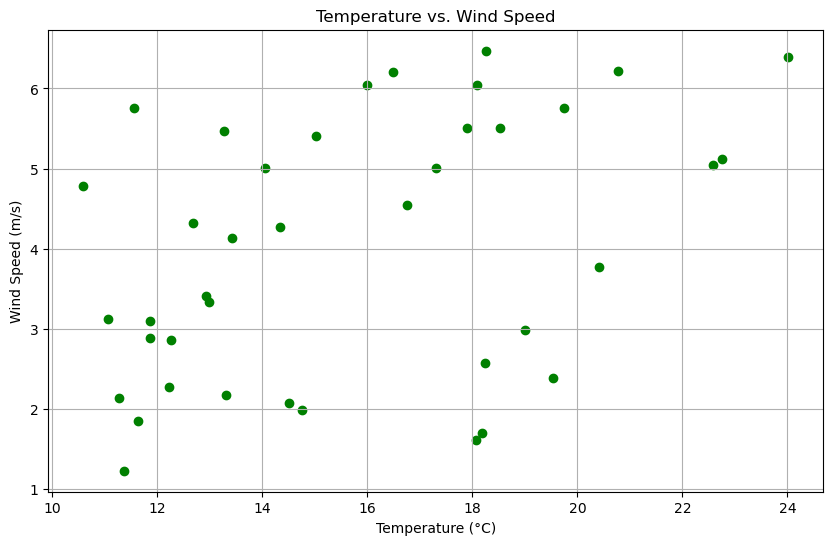

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

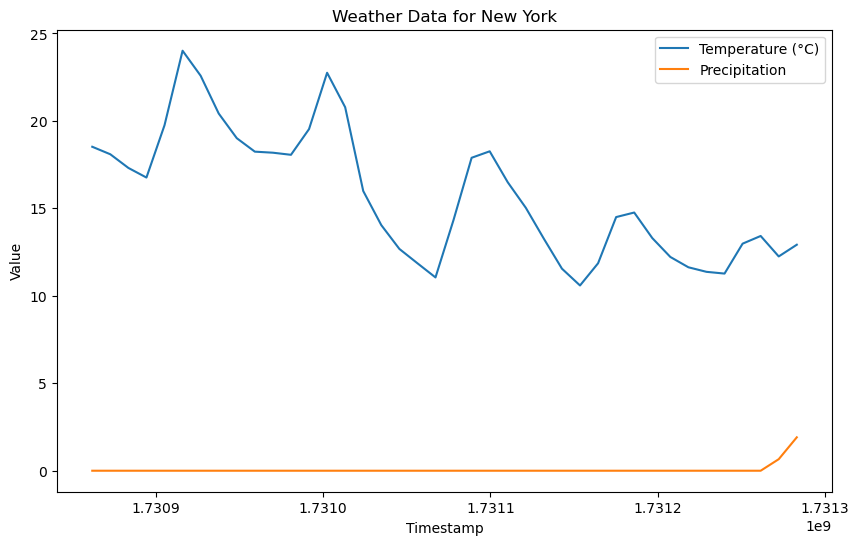

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(timestamps, temperatures, label="Temperature (°C)")
plt.plot(timestamps, precipitation, label="Precipitation")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Weather Data for {}".format(city_name))
plt.legend()
plt.show()

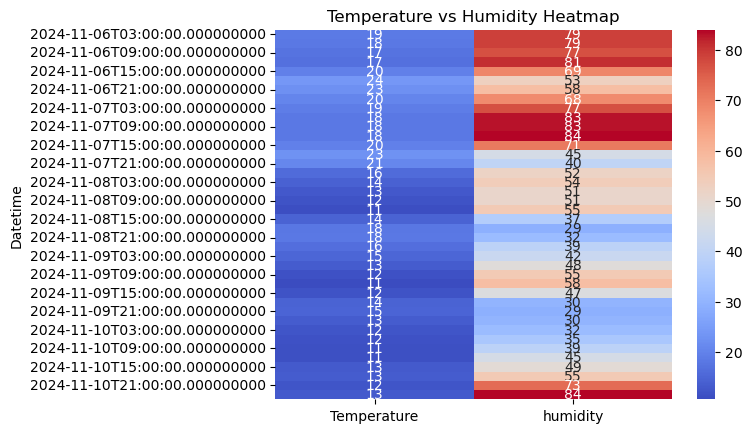

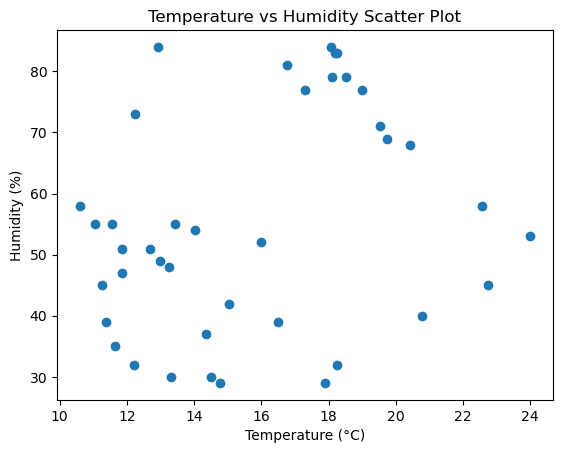

In [28]:
import seaborn as sns

heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()
# Create a scatter plot to visualize the relationship between temperature and humid
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()

In [36]:
import pandas as pd
import requests

# Specify the locations for which you want to retrieve weather data
locations = ['London', 'Paris', 'New York']

# Create an empty DataFrame to store weather data
weather_df = pd.DataFrame()

# Retrieve weather data for each location
for location in locations:
    # Construct the API URL with the actual API key
    api_url = f'http://api.openweathermap.org/data/2.5/weather?q={location}&appid=fb365aa6104829b44455572365ff3b4e'
    
    # Make the API request
    response = requests.get(api_url)
    data = response.json()
    
    # Check if the 'main' key exists in the response
    if 'main' in data:
        # Extract relevant weather attributes
        temperature = data['main']['temp']
        humidity = data['main']['humidity']
        wind_speed = data['wind']['speed']
        
        # Check if 'coord' key is present before accessing it
        latitude = data.get('coord', {}).get('lat', None)
        longitude = data.get('coord', {}).get('lon', None)
        
        # Create a DataFrame for the current location's weather data
        location_df = pd.DataFrame({
            'Location': [location],
            'Temperature': [temperature],
            'Humidity': [humidity],
            'Wind Speed': [wind_speed],
            'Latitude': [latitude],
            'Longitude': [longitude]
        })
        
        # Use pd.concat() to add the current location's weather data to the main DataFrame
        weather_df = pd.concat([weather_df, location_df], ignore_index=True)
    else:
        print(f"Error retrieving data for {location}: {data.get('message', 'Unknown error')}")

# Display the DataFrame with weather data
print(weather_df)


   Location  Temperature  Humidity  Wind Speed  Latitude  Longitude
0    London       282.68        92        2.06   51.5085    -0.1257
1     Paris       284.02        94        2.57   48.8534     2.3488
2  New York       291.80        77        5.66   40.7143   -74.0060


In [37]:
weather_df

,Location,Temperature,Humidity,Wind Speed,Latitude,Longitude
0,London,282.68,92,2.06,51.5085,-0.1257
1,Paris,284.02,94,2.57,48.8534,2.3488
2,New York,291.80,77,5.66,40.7143,-74.0060


In [38]:
latitude = data.get("coord", {}).get("lat", 0)
longitude = data.get("coord", {}).get("lon", 0)
# Create a Folium map centered around the city
weather_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add markers for each location in the DataFrame
for index, row in weather_df.iterrows():
    location_name = row['Location']
    latitude = row['Latitude']
    longitude = row['Longitude']
# Create a marker and add it to the map
    folium.Marker([latitude, longitude], popup=location_name).add_to(weather_map)

In [39]:
weather_map

In [40]:
folium.Marker([latitude, longitude], popup=city_name).add_to(weather_map)
# Display the map
weather_map.save("weather_map.html")